# Predicting the Price of LNG Based on Crude Oil Prices and Global Temperature

Natural gas is comparatively clean fuel that currently accounts for 21.6% of all electricity generated in the world. As such, a model that can accurately predict the price of natural gas would be highly valuable in the commodities market. Natural gas prices tend to spike whenever demand for electricity rises, like particularly hot or cold weather since more people will switch on heaters or airconditioning. The price for natural gas is also pegged to the price of crude oil in various markets. As such, I'll be trying to see if we can try and predict the price of natural gas using the crude oil prices and temperature variations from the norm.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style = 'whitegrid')

#This imports the usual suspects

I gathered the monthly crude oil and natural prices from 1997 to 2013 from the US Energy Information Administration, and combined it with temperature data from two major cities that rely heavily on natural gas to generate electricity, Tokyo and Los Angeles, which was taken from Climate Change: Earth Surface Temperature Data from Kaggle.

In [4]:
Temp_List = pd.read_csv('Gas Oil and Temperature.csv')
Temp_List.head()

,Month,Gas Price,Oil Price,Temperature in Tokyo,Variation From Mean,Temperature in LA,Variation From Mean (LA)
0,Aug-13,3.43,111.28,26.364,6.364,24.232,0.768
1,Jul-13,3.62,107.93,24.645,4.645,25.090,0.090
2,Jun-13,3.83,102.92,20.927,0.927,22.434,2.566
3,May-13,4.04,102.56,16.757,3.243,19.028,5.972
4,Apr-13,4.17,102.25,11.310,8.690,15.921,9.079


At this point, we have the monthly prices of 1MMBtu of natural gas and 1 barrel of Brent crude oil. We also have the monthly average temperature of Tokyo and LA and two columns describing how far they are from the comfortable temperature of 25 degrees Celsius.

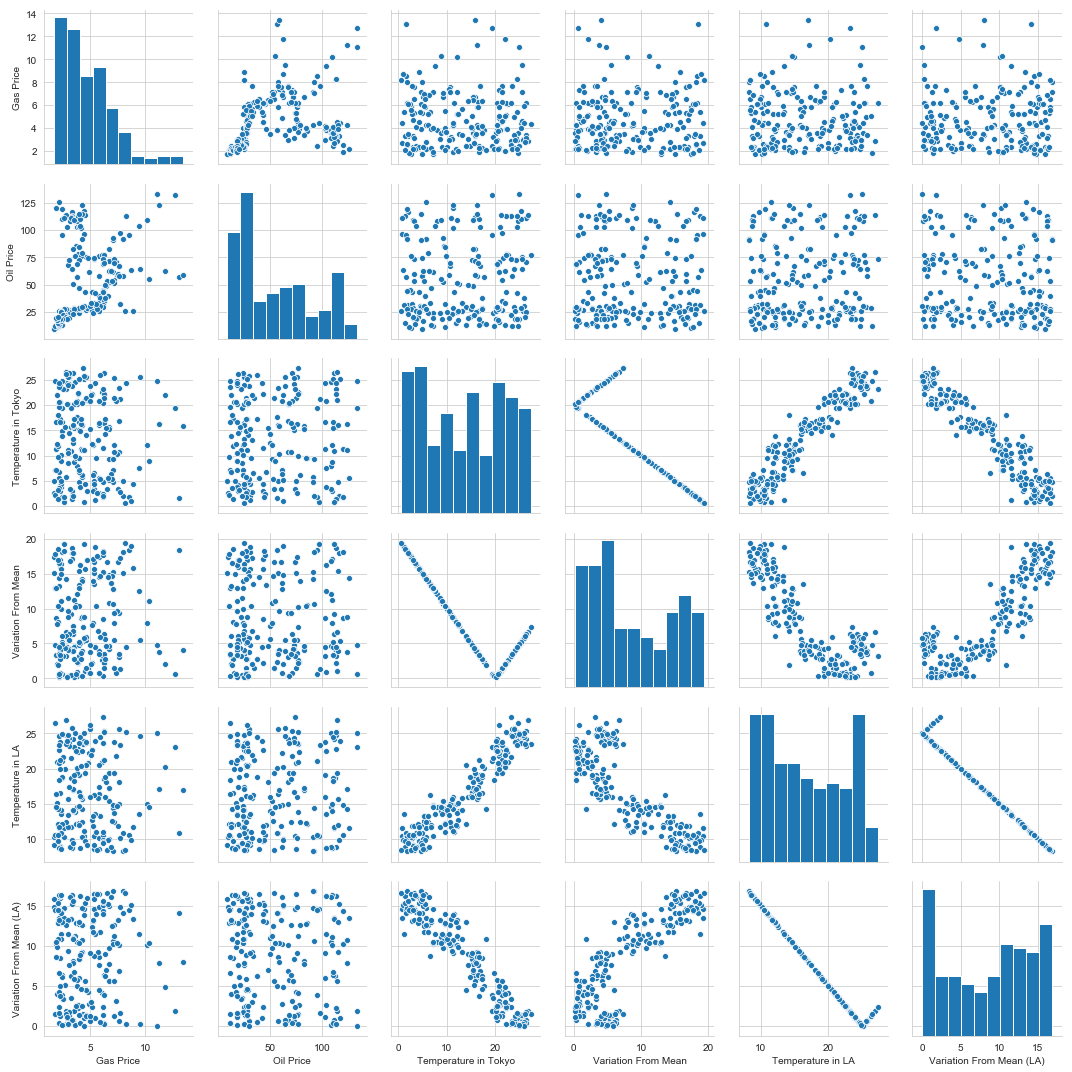

In [6]:
sns.pairplot(data = Temp_List)

Judging by the pair plots, it doesn't seem like there are obvious correlations between the three aforementioned independent variables and the price of natural gas. But let's try running them through a few models to see if we can glean anything. We'll create a linear regression model for each one to see the results

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = Temp_List['Oil Price']
y = Temp_List['Gas Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

Price_Model = LinearRegression()
Price_Model.fit(X_train.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that we've trained the model, let's see the results

MAE: 2.1302811625055567
MSE: 6.456011106150286
RMSE: 2.540868179609144


C:\Users\Wong Cheng Heng\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


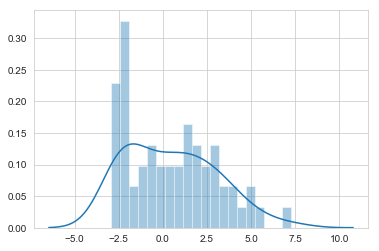

In [17]:
from sklearn import metrics

Predictions = Price_Model.predict(X_test)
sns.distplot((y_test-Predictions),bins=20); #The fact that this graph is not normally distributed is cause for concern

print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

Text(0.5,0,'Actual Gas Price')

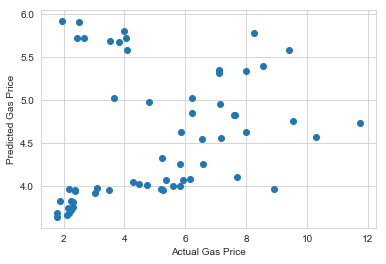

In [13]:
#Plotting the predicted gas prices against the actual gas prices in the training set

plt.scatter(y_test,Predictions)
plt.ylabel('Predicted Gas Price')
plt.xlabel('Actual Gas Price')

Unfortunately, the model turned out to be a poor predictor of LNG prices, given the high MAE, MSE and RMSE values. This is even clearer with the graph of predicted gas prices against actual gas prices. An accurate model would have produced a straight line since the its predicted values would be similar to the actual values, but as we can see from the graph above, this is sadly not the case. Now we shall try with the other two variables : variations in temperature in Tokyo and Los Angeles. We'll try it out with Tokyo first.

In [24]:
X = Temp_List['Variation From Mean']
y = Temp_List['Gas Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

Price_Model2 = LinearRegression()
Price_Model2.fit(X_train.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
Predictions2 = Price_Model2.predict(X_test)

Text(0.5,0,'Actual Gas Price')

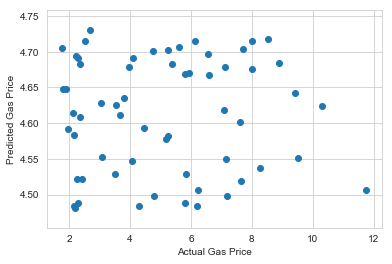

In [29]:
plt.scatter(y_test,Predictions2)
plt.ylabel('Predicted Gas Price')
plt.xlabel('Actual Gas Price')

Unfortunately, the linear regression model performed very poorly using temperature variations in Tokyo as well. Now we'll try using temperature variations for Los Angeles.

In [33]:
X = Temp_List['Variation From Mean (LA)']
y = Temp_List['Gas Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

Price_Model3 = LinearRegression()
Price_Model3.fit(X_train.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5,0,'Actual Gas Price')

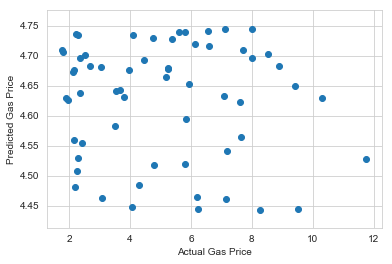

In [35]:
Predictions3 = Price_Model3.predict(X_test)
plt.scatter(y_test,Predictions3)
plt.ylabel('Predicted Gas Price')
plt.xlabel('Actual Gas Price')

Sadly, it didn't perform well for temperature variations in Los Angeles either. This is could be due to many reasons : poor choice of model, temperature fluctuations were not well-defined or the price of natural gas simply not being that correlated with these factors.

# Trying again with more detailed natural gas and crude oil prices

I tried again to train a linear regression model using crude oil prices to predict natural gas prices. This time, I used daily crude oil and natural gas prices all the way from 1998 to 2019. I hoped that it more detailed information and a larger dataset would help better capture the relationship of crude oil and natural gas prices. The data was taken from the US EIA as well.

In [39]:
Full_List = pd.read_csv('Combined List.csv')
Full_List.head()

,Day,Gas Price,Oil Price
0,1/3/2019,2.72,53.23
1,1/2/2019,3.25,54.06
2,12/28/2018,3.25,50.57
3,12/27/2018,3.10,51.49
4,12/21/2018,3.70,51.93


The data was rather fragmented, since there were days where either crude oil was not traded while natural was and vice-versa, meaning that there would be days where there was a price reported for one hydrocarbon but not the other. Eliminating those gaps and cleaning up the data was crucial in ensuring the prices from the same date synced up.

In [41]:
X = Full_List['Oil Price']
y = Full_List['Gas Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

Price_Model4 = LinearRegression()
Price_Model4.fit(X_train.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
Predictions4 = Price_Model4.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, Predictions4))
print('MSE:', metrics.mean_squared_error(y_test, Predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions4)))

MAE: 1.7331698493600274
MSE: 4.893454802033525
RMSE: 2.212115458567551


Text(0.5,0,'Actual Gas Price')

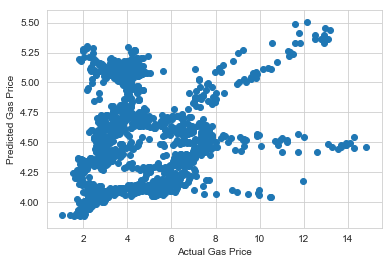

In [43]:
plt.scatter(y_test,Predictions4)
plt.ylabel('Predicted Gas Price')
plt.xlabel('Actual Gas Price')

The model performed slightly better than the previous one using crude oil, but it is still a poor showing given how large the difference between the predicted and actual gas values remains.

In the future, I intend to continue working on this using different models and new variables as I get more proficient with Python and implementing machine learning models.